# Name : Anushka Bhatia

# Data Science and Business Analytics 

# Predict the percentage of a student based on the number of study hours

# Task 1: Prediction using Supervised ML

including the required Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING THE DATA FROM DATASET

In [4]:
url =  "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# TO CHECK THE MISSING VALUES

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# TO GENERATE DESCRIPTIVE STATISTICS

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# DATA VISUALIZATION

In [9]:
x = data['Hours']
y = data['Scores']

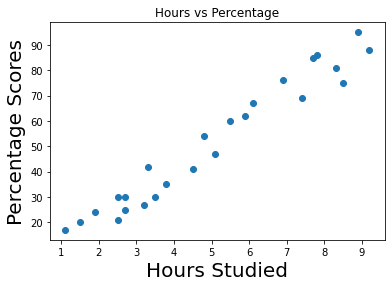

In [10]:
plt.scatter(x,y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Scores',fontsize=20)
plt.show()

# LINEAR REGRESSION MODEL

Preparing the Data

In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

# TRAINING THE MODEL

The values taken from the training dataset are trained using linear regression model algorithm.

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Training successful")

Training successful


# PLOTTING THE REGRESSION LINE

Now,printing the coefficient and intercept values required to plot the regression line.

In [23]:
reg.coef_

array([9.78856669])

In [24]:
reg.intercept_

2.370815382341881

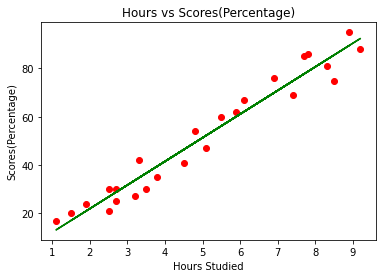

In [25]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x,y,color="red")
plt.title("Hours vs Scores(Percentage)")
plt.xlabel("Hours Studied")
plt.ylabel("Scores(Percentage)")
plt.plot(x,line,color="green")
plt.show()

# PREDICTING THE SCORES

In [27]:
#testing the data in hours
print(x_test)

#predicting the scores
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


Comparing Predicted data with Actual Data|

In [28]:
data = pd.DataFrame({'Actual' : y_test, 'Predicted' :y_pred})
data
        

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Predicting the score of the student for given time can be directly calculated by predict function

In [30]:
#predict values by own data
hours = [9.25]
own_pred = reg.predict([hours])
print("No. of Hours = ",format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours =  [9.25]
Predicted Score = 92.91505723477056


# EVALUATING THE MODEL

They are used for everything how well distinct algorithms perform well on datasets.Here,I have evaluated the model using mean absolute error ,mean squared error and root mean squared error.

In [34]:
from sklearn import metrics
print("Mean Absolute error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error: 4.419727808027652
Mean Squared error: 22.96509721270043
Root Mean Squared error: 4.792191274636315
